###  확률론적 언어 모형

In [2]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

#### 확률론적 언어 모형의 활용

- 철자 및 문법 교정
- 음성 인식
- 자동 번역
- 자동 요약
- 챗봇

#### 일반적 문장 확률

- 조건부 확률의 곱

####  유니그램 모형, 바이그램 모형(현실적)

만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 바이그램 모형 또는 마코프 모형 이라고 한다.

####  NLTK 패키지의 바이그램 모형

- ngram 명령으로 문장을 바이그램 분해
- ConditionalFreqDist 클래스로 각 문맥별 단어 빈도를 측정
- ConditionalFreqDist 클래스로 조건부 확률을 추정한다

In [3]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

In [5]:
sentences = []

for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='SS',
                   right_pad_symbol='SE')
    sentences += [t for t in bigram]

####  ConditionalFreqDist 객체 생성

In [8]:
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

In [9]:
cfd['SS'].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

In [11]:
import matplotlib.pyplot as plt

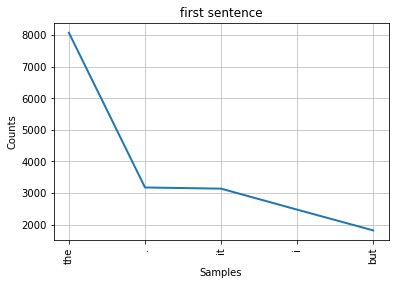

In [12]:
cfd['SS'].plot(5, title='first sentence')
plt.show()

In [13]:
# i 다음에 올 수 있는 단어들
cfd['i'].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

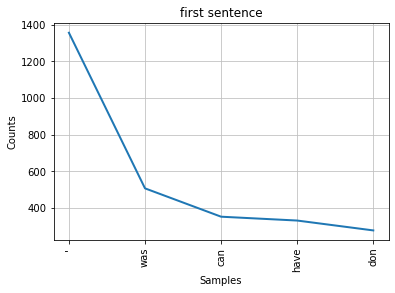

In [14]:
cfd['i'].plot(5, title='first sentence')
plt.show()

In [15]:
# 마침표 다음에 올수있는 단어들
cfd['.'].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

#### 조건부 확률 추정

In [19]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)

In [20]:
cpd['i'].prob('am')

0.018562267971650354

In [21]:
cpd['i'].prob('is')

0.0002249971875351558

In [23]:
cpd['we'].prob('are')

0.08504504504504505

In [24]:
cpd['we'].prob('is')

0.0

In [30]:
import numpy as np

In [31]:
# 조건부 확률 공식
def sentence_score(s):
    p = 0.0
    for i in range(len(s) -1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [32]:
test_scntence = ['i','like','the','movie','.']
sentence_score(test_scntence)

2.740764134071561e-06

In [33]:
test_scntence = ['i','like','the','.','movie']
sentence_score(test_scntence)

4.079308451537719e-24

####  무작위 문장 생성

In [37]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
        
    c = 'SS'
    
    sentence=[]
    
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()
        
        if w == 'SE':
            break
        else:
            w2 = w
            
            
        if c == 'SS':
            sentence.append(w2.title())
        else:
            sentence.append(' ' + w2)

        c = w

    return ''.join(sentence)

In [48]:
generate_sentence()

'Blade runner , one tape into the world of the life like silence of b - see a good guys for the way to the day a place .'

###  Soynlp 소개

soynlp 는 한국어 처리를 위한 파이썬 패키지 중 하나다. koNLPy 에서 제공하는 형태소 분석기는 형태소 기반으로 문서를 토큰화 할 수 있는 기능을 제공하지만 새롭게 만들어진 미등록 단어들은 인식이 잘 되지않는 단점을 가지고 있다. 이를 해결하기 위해서는 사용자 사전에 단어를 등록하는 절차를 걸쳐야 한다. soynlp는 이러한 과정을 돕기 위해 사용자 사전과 형태소분석 없이 cohesion 기반으로 토큰화를 할 수 이쓴ㄴ 기능을 제공한다

In [49]:
pip install soynlp

Note: you may need to restart the kernel to use updated packages.


In [52]:
!wget https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [59]:
import requests
fname = 'guppy-0.1.10.tar.gz'
url = 'https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

14

<Response [404]>

In [57]:
from soynlp import DoublespaceLineCorpus

# 문서 단위 말뭉치 생성 
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)  # 문서의 갯수

local variable 'f' referenced before assignment


ValueError: __len__() should return >= 0

In [61]:
import nltk

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\82109\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [62]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [64]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [65]:
from gensim.models.word2vec import Word2Vec

In [66]:
%%time
model = Word2Vec(sentences)

Wall time: 5.15 s


In [67]:
model.init_sims(replace=True)

In [68]:
model.wv.similarity('actor','actress')

0.88651276

In [69]:
model.wv.similarity('he','she')

0.84905446

In [70]:
model.wv.similarity('actor','she')

0.24928354

In [73]:
model.wv.most_similar('dog')

[('horse', 0.8605211973190308),
 ('boy', 0.8491442799568176),
 ('cat', 0.8490171432495117),
 ('baby', 0.8485668301582336),
 ('kid', 0.8449481725692749),
 ('lady', 0.8199204206466675),
 ('secret', 0.808533787727356),
 ('mask', 0.8070818185806274),
 ('mom', 0.8048270344734192),
 ('dad', 0.80295729637146)]

In [74]:
model.wv.most_similar(positive=['she','actor'],negative='actress',topn=1)

[('he', 0.3020668029785156)]